In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import pandas as pd
import numpy as np
import math
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import tensorflow_datasets as tfds

In [3]:
import tensorflow as tf 
from sklearn.decomposition import PCA
import keras

In [4]:
(x_train, y_train),(x_test, y_test) = tf.keras.datasets.boston_housing.load_data()

57026/57026 [==============================] - 0s 0us/step


In [5]:
x_train.shape

(404, 13)

In [6]:
classes = ['CRIM',     #per capita crime rate by town 
 'ZN',                 #proportion of residential land zoned for lots over 25,000 sq.ft.
 'INDUS',              #proportion of non-retail business acres per town
 'CHAS',               #Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
 'NOX',                #nitric oxides concentration (parts per 10 million)
 'RM',                 #average number of rooms per dwelling
 'AGE',                #proportion of owner-occupied units built prior to 1940
 'DIS',                #weighted distances to five Boston employment centres
 'RAD',                #index of accessibility to radial highways
 'TAX',                #full-value property-tax rate per $10,000
 'PTRATIO',            #pupil-teacher ratio by town
 'B',                  #1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
 'LSTAT'              #% lower status of the population
          ]

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

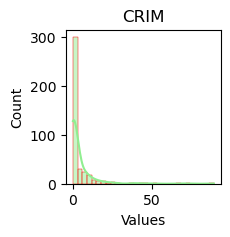

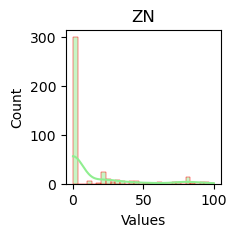

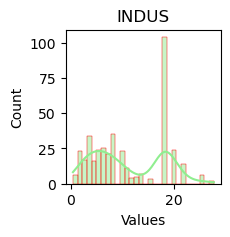

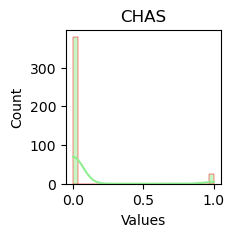

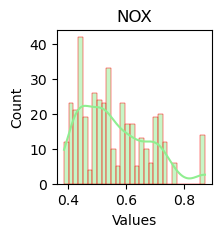

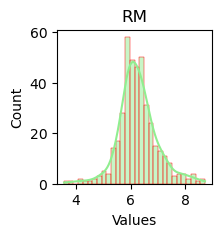

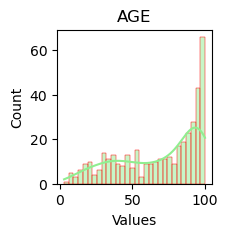

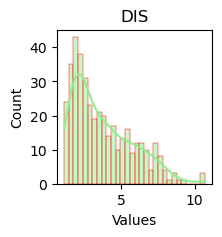

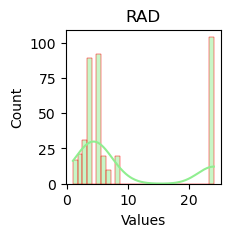

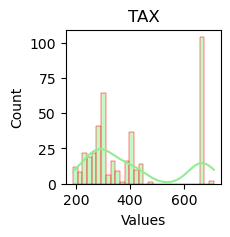

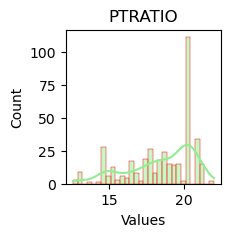

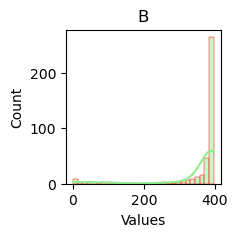

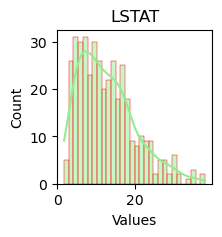

In [8]:
def plot():
    for i in range(13):
        fig, ax = plt.subplots(figsize = (2, 2))
        sns.histplot(x_train[:,i], bins= 30,kde=True,color='lightgreen', edgecolor='red')
        plt.title(f'{classes[i]}')
        plt.xlabel('Values')
plot()
plt.show()

In [9]:
scaler = StandardScaler()
x_train=scaler.fit_transform(x_train)    
x_test= scaler.transform(x_test)  

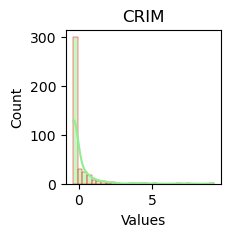

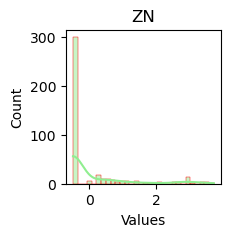

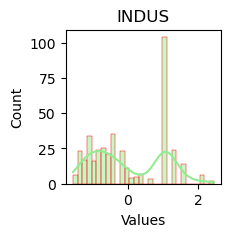

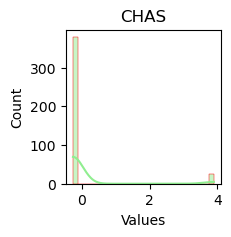

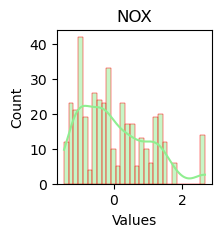

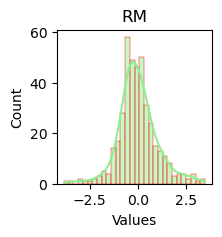

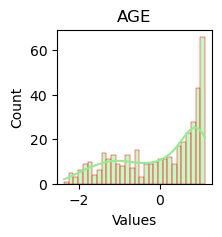

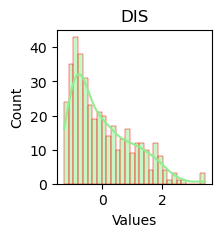

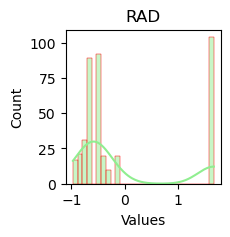

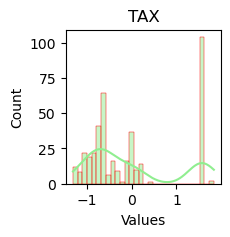

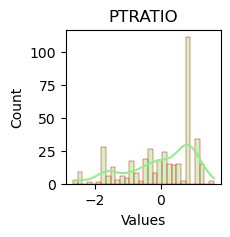

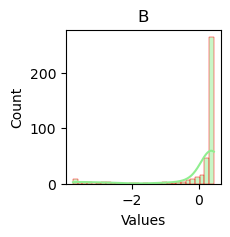

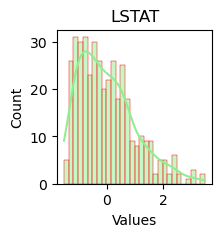

In [10]:
plot()
plt.show()

In [11]:
inputs = tf.keras.layers.Input(shape = x_train.shape[1:])
x = tf.keras.layers.Dense(512,activation='elu')(inputs)
x = tf.keras.layers.Dense(256,activation='elu')(x)
x = tf.keras.layers.Dense(256,activation='relu')(x)
x = tf.keras.layers.Dense(256,activation='relu')(x)
x = tf.keras.layers.Dense(256,activation='relu')(x)
x = tf.keras.layers.Dense(128,activation='relu')(x)
output = tf.keras.layers.Dense(1,activation='relu')(x)
model = tf.keras.models.Model(inputs = [inputs] , outputs = [output])
model.compile(loss=tf.keras.losses.mse, optimizer=tf.keras.optimizers.Adam())
model.fit(x_train,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
11/11 [==============================] - 2s 35ms/step - loss: 452.6989 - val_loss: 163.5592
Epoch 2/100
11/11 [==============================] - 0s 11ms/step - loss: 95.9503 - val_loss: 79.8105
Epoch 3/100
11/11 [==============================] - 0s 11ms/step - loss: 47.2141 - val_loss: 38.4288
Epoch 4/100
11/11 [==============================] - 0s 11ms/step - loss: 29.1681 - val_loss: 17.3781
Epoch 5/100
11/11 [==============================] - 0s 12ms/step - loss: 18.2581 - val_loss: 14.0356
Epoch 6/100
11/11 [==============================] - 0s 11ms/step - loss: 16.5728 - val_loss: 25.1676
Epoch 7/100
11/11 [==============================] - 0s 12ms/step - loss: 13.2301 - val_loss: 13.6958
Epoch 8/100
11/11 [==============================] - 0s 10ms/step - loss: 13.1052 - val_loss: 15.7329
Epoch 9/100
11/11 [==============================] - 0s 10ms/step - loss: 10.8512 - val_loss: 13.7563
Epoch 10/100
11/11 [==============================] - 0s 12ms/step - loss: 9.873

In [12]:
x_pred = model.predict(x_test)

4/4 [==============================] - 0s 3ms/step


In [13]:
print(tf.keras.losses.mse(y_test,x_pred))

tf.Tensor(
[273.3572   102.59421   90.38098  226.60614   84.26148   85.0051
 117.19874   84.65346   97.48827  103.734726  95.41774  130.8385
 139.45776  485.3076    96.47446   88.07736   85.62158   88.33692
 102.47814  118.50204  197.0059   231.06834   91.22093  151.33646
  96.30197   89.21714  113.42539   92.09657  212.44516   88.25453
  96.163605 127.27457  187.65662   83.26674   94.41812  305.349
 131.90062  114.78791  112.54279   90.15374  143.97946  102.17709
 169.41254  457.19107   92.19074   97.23082   99.00808  112.6587
  93.55934   83.24793  215.25992   96.80231  226.16348  171.21622
 295.2712   111.06033  202.47182  824.4985   189.62177   83.57562
  87.34611  163.78201  120.95937   96.001396  83.61535   85.444664
 179.34865   84.899704 137.13197  281.2711   103.655525 105.458565
 110.58155  144.4076    90.00686   92.9296    91.604706  86.51627
 234.44643  233.25919   84.31829  345.7209   145.78084  154.39043
 117.29421   90.789925  90.41723   89.41947   83.57746   84.98207
  